In [61]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn import tree


import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [73]:
df = pd.read_json("https://raw.githubusercontent.com/Mateusz-Matejko/rental-real-estate-market-in-gdansk/master/project/data/time-series-and-original-data/collected-oct-27/original-data/original-data-oct27.json")

In [74]:
df.head()

,rent,publish-date,title,link,Prywatne,Poziom,Umeblowane,Rodzaj zabudowy,Powierzchnia,Liczba pokoi,Czynsz (dodatkowo),Firmowe
0,3 600 zł,24 października 2022,Wynajmę mieszkanie dla 3 studentek,https://www.olx.pl/d/oferta/wynajme-mieszkanie...,Tak,1,Tak,Dom wolnostojący,44 m²,3 pokoje,1 zł,NaN
1,2 100 zł,21 października 2022,NOWA CENA! Mieszkanie w Nowym Porcie (50m2). O...,https://www.olx.pl/d/oferta/nowa-cena-mieszkan...,NaN,2,Tak,Blok,50 m²,2 pokoje,800 zł,Tak
2,2 600 zł\n do negocjacji,21 października 2022,"Mieszkanie 52m2 Gdańsk Przymorze, długoterminowo",https://www.olx.pl/d/oferta/mieszkanie-52m2-gd...,Tak,2,Tak,Blok,54 m²,3 pokoje,550 zł,NaN
3,2 500 zł\n do negocjacji,26 października 2022,Mieszkanie do wynajęcia,https://www.olx.pl/d/oferta/mieszkanie-do-wyna...,Tak,1,Tak,Kamienica,37 m²,2 pokoje,300 zł,NaN
4,1 400 zł,20 października 2022,Wynajmę kawalerkę w centrum Gdańska,https://www.olx.pl/d/oferta/wynajme-kawalerke-...,Tak,4,Tak,Blok,18 m²,Kawalerka,350 zł,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rent                614 non-null    object
 1   publish-date        614 non-null    object
 2   title               614 non-null    object
 3   link                614 non-null    object
 4   Prywatne            526 non-null    object
 5   Poziom              591 non-null    object
 6   Umeblowane          614 non-null    object
 7   Rodzaj zabudowy     614 non-null    object
 8   Powierzchnia        614 non-null    object
 9   Liczba pokoi        614 non-null    object
 10  Czynsz (dodatkowo)  614 non-null    object
 11  Firmowe             88 non-null     object
dtypes: object(12)
memory usage: 57.7+ KB


In [65]:
df.columns.shape

(12,)

In [76]:
new_columns = ["rent_price", "publish_date", "title", "link", "private", "level", 
               "furnished", "building_type", "surface", "rooms", "rent_extra", "brooker"]
len(new_columns)

12

In [77]:
df.columns = new_columns

In [78]:
df.columns

Index(['rent_price', 'publish_date', 'title', 'link', 'private', 'level',
       'furnished', 'building_type', 'surface', 'rooms', 'rent_extra',
       'brooker'],
      dtype='object')

In [79]:
df.head()

,rent_price,publish_date,title,link,private,level,furnished,building_type,surface,rooms,rent_extra,brooker
0,3 600 zł,24 października 2022,Wynajmę mieszkanie dla 3 studentek,https://www.olx.pl/d/oferta/wynajme-mieszkanie...,Tak,1,Tak,Dom wolnostojący,44 m²,3 pokoje,1 zł,NaN
1,2 100 zł,21 października 2022,NOWA CENA! Mieszkanie w Nowym Porcie (50m2). O...,https://www.olx.pl/d/oferta/nowa-cena-mieszkan...,NaN,2,Tak,Blok,50 m²,2 pokoje,800 zł,Tak
2,2 600 zł\n do negocjacji,21 października 2022,"Mieszkanie 52m2 Gdańsk Przymorze, długoterminowo",https://www.olx.pl/d/oferta/mieszkanie-52m2-gd...,Tak,2,Tak,Blok,54 m²,3 pokoje,550 zł,NaN
3,2 500 zł\n do negocjacji,26 października 2022,Mieszkanie do wynajęcia,https://www.olx.pl/d/oferta/mieszkanie-do-wyna...,Tak,1,Tak,Kamienica,37 m²,2 pokoje,300 zł,NaN
4,1 400 zł,20 października 2022,Wynajmę kawalerkę w centrum Gdańska,https://www.olx.pl/d/oferta/wynajme-kawalerke-...,Tak,4,Tak,Blok,18 m²,Kawalerka,350 zł,NaN


### handling ren_extra

In [80]:
df["rent_extra"] = df["rent_extra"].str.replace("zł", "").str.replace(",","").str.strip().str.replace(" ","").astype(int)

In [81]:
df["rent_price"] = df["rent_price"].str.replace("zł", "").str.replace(",","").str.strip().str.replace(" ","").str.replace("\ndonegocjacji", "").astype(int)

In [82]:
df["rooms"].unique()

array([' 3 pokoje', ' 2 pokoje', ' Kawalerka', ' 4 i więcej'],
      dtype=object)

In [83]:
rooms_dict = {
    ' Kawalerka': 1, 
    ' 3 pokoje': 3, 
    ' 2 pokoje': 2, 
    ' 4 i więcej': 4,
}

df["rooms"] = df["rooms"].map(rooms_dict)

In [84]:
df.surface.unique()

array([' 44 m²', ' 50 m²', ' 54 m²', ' 37 m²', ' 18 m²', ' 42 m²',
       ' 40 m²', ' 33,36 m²', ' 30 m²', ' 38 m²', ' 35 m²', ' 22 m²',
       ' 32 m²', ' 23 m²', ' 53 m²', ' 17 m²', ' 39 m²', ' 45 m²',
       ' 55 m²', ' 29 m²', ' 25 m²', ' 34 m²', ' 64 m²', ' 20 m²',
       ' 26,40 m²', ' 43 m²', ' 27 m²', ' 61 m²', ' 65 m²', ' 60 m²',
       ' 56 m²', ' 41 m²', ' 46 m²', ' 24 m²', ' 36 m²', ' 63 m²',
       ' 26 m²', ' 31 m²', ' 67 m²', ' 47 m²', ' 70 m²', ' 75 m²',
       ' 48 m²', ' 52 m²', ' 25,50 m²', ' 33 m²', ' 15 m²', ' 45,60 m²',
       ' 51 m²', ' 28 m²', ' 25,47 m²', ' 37,50 m²', ' 49 m²',
       ' 40,25 m²', ' 69 m²', ' 46,20 m²', ' 85 m²', ' 57 m²', ' 79 m²',
       ' 76 m²', ' 58 m²', ' 26,60 m²', ' 47,80 m²', ' 19 m²',
       ' 34,30 m²', ' 50,50 m²', ' 44,58 m²', ' 40,50 m²', ' 71 m²',
       ' 77 m²', ' 59,50 m²', ' 72 m²', ' 78 m²', ' 42,43 m²', ' 84 m²',
       ' 170 m²', ' 48,20 m²', ' 62 m²', ' 36,60 m²', ' 30,50 m²',
       ' 48,50 m²', ' 31,50 m²', ' 48,78 m²'

In [85]:
just_space = lambda x:str(x[1:-3])

In [86]:
df["surface"] = df["surface"].apply(just_space)

In [87]:
df["surface"] = pd.to_numeric(df["surface"].str.replace(",","."))

In [88]:
df["level"].unique()

array([' 1', ' 2', ' 4', ' 3', ' Parter', ' 5', ' 8', nan, ' 6', ' 7',
       ' 10', ' Powyżej 10', ' 9'], dtype=object)

In [89]:
df.head()

,rent_price,publish_date,title,link,private,level,furnished,building_type,surface,rooms,rent_extra,brooker
0,3600,24 października 2022,Wynajmę mieszkanie dla 3 studentek,https://www.olx.pl/d/oferta/wynajme-mieszkanie...,Tak,1,Tak,Dom wolnostojący,44.0,3,1,NaN
1,2100,21 października 2022,NOWA CENA! Mieszkanie w Nowym Porcie (50m2). O...,https://www.olx.pl/d/oferta/nowa-cena-mieszkan...,NaN,2,Tak,Blok,50.0,2,800,Tak
2,2600,21 października 2022,"Mieszkanie 52m2 Gdańsk Przymorze, długoterminowo",https://www.olx.pl/d/oferta/mieszkanie-52m2-gd...,Tak,2,Tak,Blok,54.0,3,550,NaN
3,2500,26 października 2022,Mieszkanie do wynajęcia,https://www.olx.pl/d/oferta/mieszkanie-do-wyna...,Tak,1,Tak,Kamienica,37.0,2,300,NaN
4,1400,20 października 2022,Wynajmę kawalerkę w centrum Gdańska,https://www.olx.pl/d/oferta/wynajme-kawalerke-...,Tak,4,Tak,Blok,18.0,1,350,NaN


In [90]:
df["private"].fillna("Nie", inplace=True)

In [91]:
private_dict = {
    "Tak": True,
    "Nie": False
}

df["private"] = df["private"].map(private_dict)

In [92]:
df.private.unique()

array([ True, False])

In [93]:
df["furnished"].unique()

array([' Tak', ' Nie'], dtype=object)

<Axes: xlabel='furnished', ylabel='Count'>

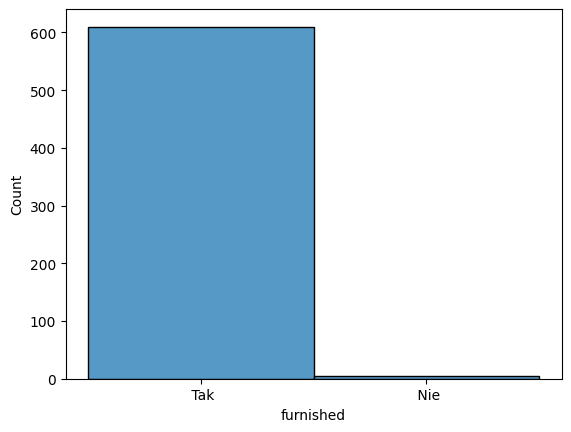

In [94]:
sns.histplot(df["furnished"])

In [95]:
df.building_type.unique()

array([' Dom wolnostojący', ' Blok', ' Kamienica', ' Apartamentowiec',
       ' Szeregowiec', ' Pozostałe', ' Loft'], dtype=object)

<Axes: xlabel='building_type', ylabel='Count'>

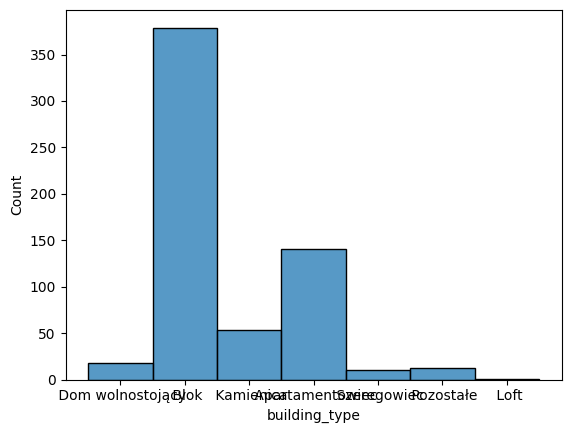

In [96]:
sns.histplot(df["building_type"])

In [98]:
building_type_dict = {' Blok': 1, ' Kamienica': 2, ' Apartamentowiec' : 3, 
                      ' Dom wolnostojący': 4, ' Szeregowiec': 4, ' Pozostałe': 4, "Loft": 4}

In [99]:
df["building_type"] = df["building_type"].map(building_type_dict)

In [100]:
df["publish_date"].unique()

array([' 24 października 2022', ' 21 października 2022',
       ' 26 października 2022', ' 20 października 2022',
       ' 18 października 2022', ' 22 października 2022',
       ' 16 października 2022', ' 25 października 2022',
       ' dzisiaj o 09:24', ' 23 października 2022',
       ' 06 października 2022', ' 17 października 2022',
       ' 29 września 2022', ' 10 października 2022',
       ' 07 października 2022', ' 15 października 2022',
       ' 12 października 2022', ' 19 października 2022',
       ' 11 października 2022', ' 05 października 2022',
       ' 14 października 2022', ' dzisiaj o 04:51',
       ' 04 października 2022', ' 30 września 2022', ' dzisiaj o 10:35',
       ' dzisiaj o 09:44', ' 09 października 2022', ' 28 września 2022',
       ' 27 września 2022', ' 01 października 2022',
       ' 03 października 2022', ' 13 października 2022',
       ' dzisiaj o 10:36', ' 08 października 2022',
       ' 02 października 2022', ' dzisiaj o 11:56', ' dzisiaj o 12:38',
       

In [101]:
df.head()

,rent_price,publish_date,title,link,private,level,furnished,building_type,surface,rooms,rent_extra,brooker
0,3600,24 października 2022,Wynajmę mieszkanie dla 3 studentek,https://www.olx.pl/d/oferta/wynajme-mieszkanie...,True,1,Tak,4.0,44.0,3,1,NaN
1,2100,21 października 2022,NOWA CENA! Mieszkanie w Nowym Porcie (50m2). O...,https://www.olx.pl/d/oferta/nowa-cena-mieszkan...,False,2,Tak,1.0,50.0,2,800,Tak
2,2600,21 października 2022,"Mieszkanie 52m2 Gdańsk Przymorze, długoterminowo",https://www.olx.pl/d/oferta/mieszkanie-52m2-gd...,True,2,Tak,1.0,54.0,3,550,NaN
3,2500,26 października 2022,Mieszkanie do wynajęcia,https://www.olx.pl/d/oferta/mieszkanie-do-wyna...,True,1,Tak,2.0,37.0,2,300,NaN
4,1400,20 października 2022,Wynajmę kawalerkę w centrum Gdańska,https://www.olx.pl/d/oferta/wynajme-kawalerke-...,True,4,Tak,1.0,18.0,1,350,NaN


In [102]:
df.shape

(614, 12)

In [103]:
df.drop_duplicates(subset=["link"], keep='first', inplace=True, ignore_index=False)

In [104]:
df.shape

(422, 12)

### Dealing with outliers

In [ ]:
## Wyrzucić 
# 8 gdzie rent_price > 



In [118]:
df["rent_extra"] = df.where(df["rent_extra"] > 1500)

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (2268849662.py, line 1)

In [ ]:
df.count`

In [122]:
df.where(cond= (df["rent_extra"] > 1500), other=1, inplace=True, axis=None, level=None)

TypeError: Cannot do inplace boolean setting on mixed-types with a non np.nan value